## Cluster analysis

**Sample data** - A survey of 34 individuals on consumption (yes/no) of different beverages:
- Coke (regular and diet)
- Pepsi (regular and diet)
- Sprite
- 7 UP (regular and diet)
- Still water

**The goal of this case** - identify the main clusters of beverage consumption

*data source: Abbakumov V.L., Lezina T.A. (2009) “Business-analysis of Information. Statistical Methods”*

In [1]:
# loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for hierarchical cluster analysis
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# for K-means cluster analysis
from sklearn.cluster import KMeans


## 1. Loading and previewing the data

In [2]:
# reading the data
df_bev = pd.read_excel('beverages.xlsx', sheet_name='data', header=0, index_col=0, na_values=['NA'])

In [3]:
# preview the data frame
df_bev.head(3)

,COKE,DietCOKE,PEPSI,DietPEPSI,SEVENUP,Diet7UP,SPRITE,StillWATER
ID,,,,,,,,
Customer1,1,0,1,0,1,0,1,0
Customer2,1,0,1,0,0,0,0,0
Customer3,1,0,1,0,0,0,0,0


In [4]:
# descriptive statistics
df_bev.describe().round(2)

,COKE,DietCOKE,PEPSI,DietPEPSI,SEVENUP,Diet7UP,SPRITE,StillWATER
count,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00
mean,0.59,0.50,0.47,0.24,0.26,0.21,0.32,0.32
std,0.50,0.51,0.51,0.43,0.45,0.41,0.47,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,1.00,0.00,0.75,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## 2. Hierarchical cluster analysis

### 2.1. Running HCA

In [5]:
# calculate linkages
hca = linkage(df_bev, method='ward', metric='euclidean')

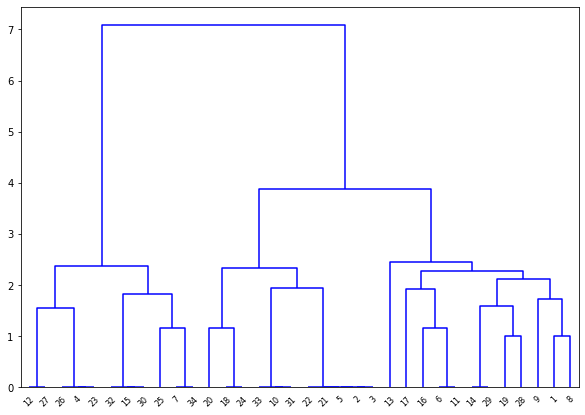

In [6]:
# create a histogram
labelList = range(0,35)

plt.figure(figsize=(10, 7))  

dendrogram(hca, orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=0,
            show_leaf_counts=True)
plt.show()  

In [7]:
# cut the tree
bev_cut = cut_tree(hca, n_clusters=3, height=None)
bev_cut

array([[0],
       [1],
       [1],
       [2],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [1],
       [2],
       [1],
       [2]])

In [8]:
# look at the results
flattened_bev_cut = [y for x in bev_cut for y in x]
print(flattened_bev_cut)

[0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2]


### 2.2. Interpreting the clusters

In [9]:
# extract first cluster
bev_hc1 = df_bev[bev_cut==0]

# extract second cluster
bev_hc2 = df_bev[bev_cut==1]

# extract third cluster
bev_hc3 = df_bev[bev_cut==2]

# preview
bev_hc3.head(5)

,COKE,DietCOKE,PEPSI,DietPEPSI,SEVENUP,Diet7UP,SPRITE,StillWATER
ID,,,,,,,,
Customer4,0,1,0,0,0,1,0,1
Customer7,0,1,0,1,0,1,0,1
Customer12,0,1,0,0,0,0,0,1
Customer15,0,1,0,1,0,0,0,1
Customer23,0,1,0,0,0,1,0,1


In [10]:
# Question: How to correctly characterize the groups in this case?
bev_hc1.sum()

COKE           9
DietCOKE       3
PEPSI          5
DietPEPSI      1
SEVENUP        6
Diet7UP        1
SPRITE        11
StillWATER     1
dtype: int64

### 2.3. A note on PCA

In [11]:
from sklearn.decomposition import PCA as skPCA

pca = skPCA(n_components=None)
pca.fit(df_bev)

# 0,1 denote PC1 and PC2; change values for other PCs
PC1_loadings = pca.components_[0] 
PC2_loadings = pca.components_[1]
PC1_values = pca.transform(df_bev)[:,0]
PC2_values = pca.transform(df_bev)[:,1]

In [12]:
# function to construct biplots
def mybiplot(data, pc1loads, pc2loads, pc1, pc2, data_labels=True):

    for i in range(len(pc1loads)):
    # arrows project features as vectors onto PC axes
        plt.arrow(0, 0, pc1loads[i]*max(pc1), pc2loads[i]*max(pc2), color='r')#, width=0.0005, head_width=0.025)
        plt.text(pc1loads[i]*max(pc1)*1.2, pc2loads[i]*max(pc2)*1.2, list(data.columns.values)[i], color='r')

    for i in range(len(pc1)):
    # circles project observations as points onto PC axes
        plt.plot(pc1[i], pc2[i], 'bo')
        if data_labels:
            data_label = list(data.index)[i]
        else:
            data_label = ""
        
        plt.text(pc1[i]*1.2, pc2[i]*1.2, data_label, color='b')
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.show()

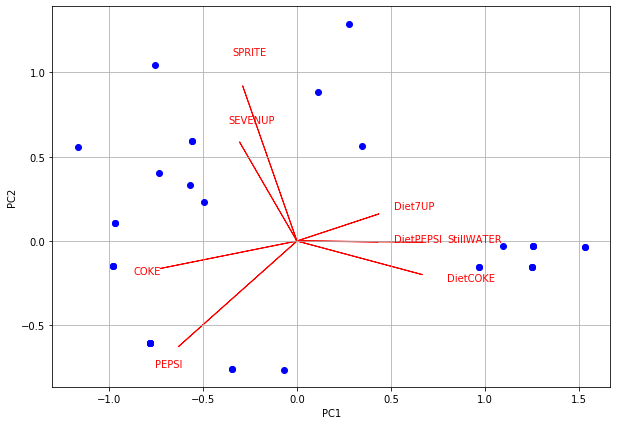

In [13]:
# construct a biplot
plt.figure(figsize=(10, 7))  
mybiplot(df_bev, PC1_loadings, PC2_loadings, PC1_values, PC2_values, data_labels=False)

## 3. K-means clustering

In [14]:
# run the kmeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_bev)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
# find assignments of observations to the clusters
clusters_km = kmeans.predict(df_bev)
print(clusters_km)

[2 0 0 1 0 2 1 2 2 0 2 1 2 2 1 2 2 0 0 0 0 0 1 0 1 1 1 2 2 1 0 1 0 1]


In [16]:
# extracting first cluster (for example)
bev_km1 = df_bev[clusters_km==1]

bev_km1.sum()

COKE           0
DietCOKE      11
PEPSI          0
DietPEPSI      6
SEVENUP        0
Diet7UP        6
SPRITE         0
StillWATER    10
dtype: int64

In [17]:
# getting the centers
centers = kmeans.cluster_centers_
print(centers.round(2))


[[ 1.    0.25  0.92  0.08  0.33 -0.   -0.   -0.  ]
 [ 0.    1.   -0.    0.55  0.    0.55 -0.    0.91]
 [ 0.73  0.27  0.45  0.09  0.45  0.09  1.    0.09]]


In [18]:
# a nicer representation
np.array2string(centers, formatter={'float_kind':'{0:.3f}'.format})

'[[1.000 0.250 0.917 0.083 0.333 -0.000 -0.000 -0.000]\n [0.000 1.000 -0.000 0.545 0.000 0.545 -0.000 0.909]\n [0.727 0.273 0.455 0.091 0.455 0.091 1.000 0.091]]'

Based on the result of different clustering methods, we may identify the three main groups of beverage consumers:
1. COKE & PEPSI lovers: those consumers are likely to prefer sweety beverages and do not much care about health issues
2. SPRITE & 7UP lovers: the group of consumers that like fresh and clean beverages, but not so sweet as coke & pepsi
3. Health carers: the consumers, that care about their health and seek for diet beverages and still water